In [1]:
from processing import extract_data
import pandas as pd

In [2]:
sim1 = extract_data("Param_Export_Example.xlsx")

In [3]:
sim1["data"]

,t,v
0,0.0010,-4.552400e-06
1,0.0030,4.414100e-06
2,0.0050,-4.304400e-06
3,0.0070,4.057600e-06
4,0.0090,-3.448700e-06
...,...,...
1247,0.1732,3.307100e-06
1248,0.1733,4.530400e-07
1249,0.1734,1.195300e-06
1250,0.1735,-2.567100e-06


In [73]:
sim1["metadata"]

,E_SPRING,B_SPRING,B_COIL,I_MAX,T_PULSE,PRE_TENSION,SHIM,SR
0,1,2,3,4,5,6,0,2


In [79]:
start = sim1["data"].where(sim1["data"]["v"]>0.001)["t"].idxmin()
data =  sim1["data"].iloc[26:]
data 

In [26]:
def cut_to_start(sim1):
    start = sim1["data"].where(sim1["data"]["v"]>0.001)["t"].idxmin()
    data =  sim1["data"].iloc[start:]
    time_shifted = data['t'] -  data['t'].min()
    data = pd.DataFrame([time_shifted,data['v']]).transpose()
    return data 

In [27]:
import matplotlib.pyplot as plt

In [28]:
data = cut_to_start(sim1)

In [29]:
data

,t,v
26,0.0000,6.472700e-03
27,0.0001,3.471000e-03
28,0.0002,5.401900e-03
29,0.0003,3.827800e-03
30,0.0004,2.488400e-03
...,...,...
1247,0.1221,3.307100e-06
1248,0.1222,4.530400e-07
1249,0.1223,1.195300e-06
1250,0.1224,-2.567100e-06


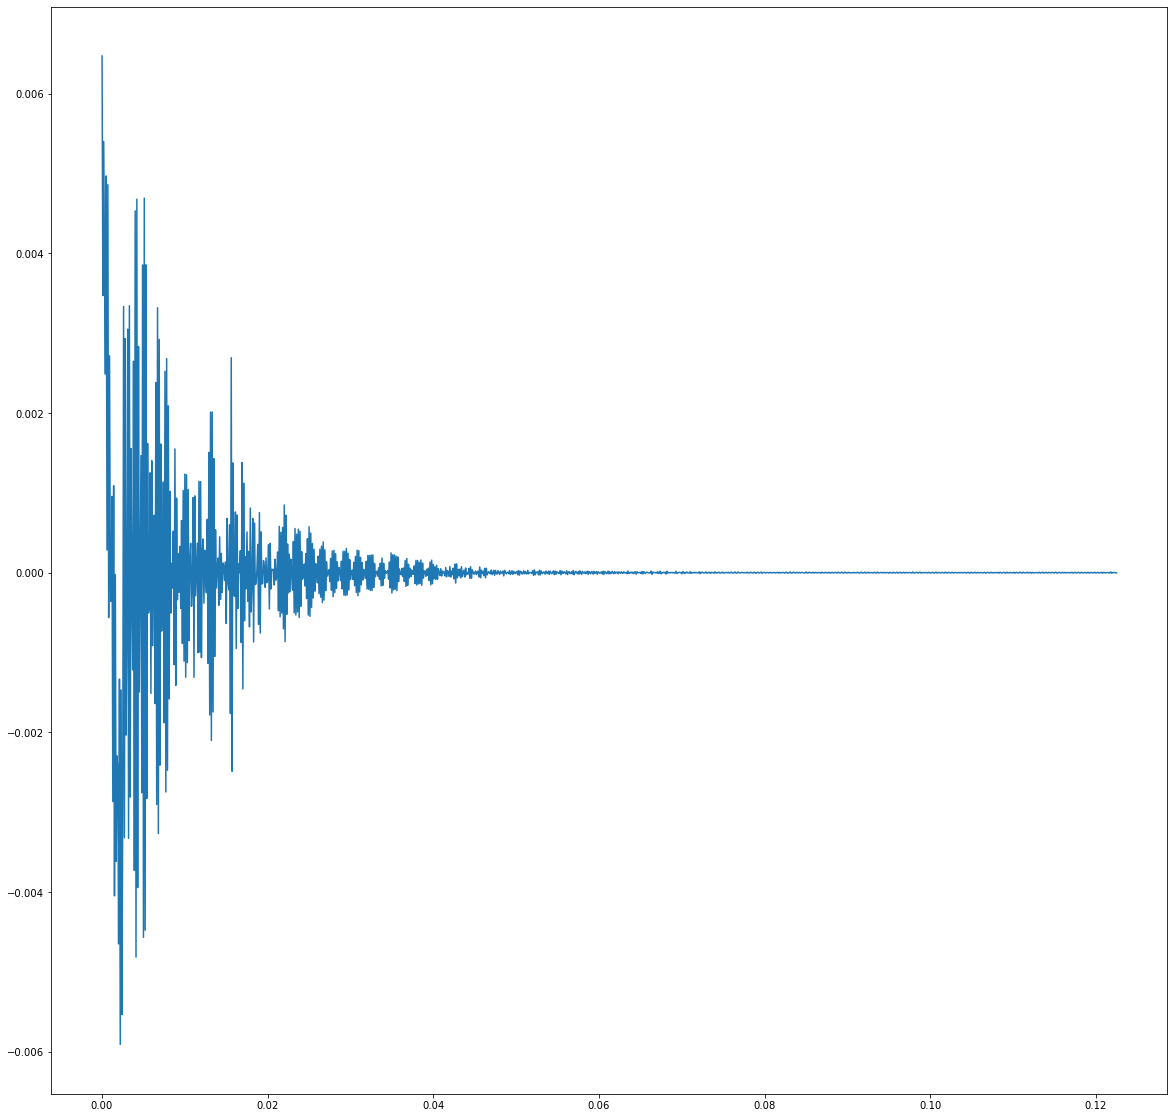

In [30]:
plt.figure(figsize=(20, 20))
plt.plot(data["t"],data["v"])
plt.show()